In [1]:
!pip install kagglehub spacy pandas
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 642.7 kB/s eta 0:00:20
     -- ------------------------------------ 0.8/12.8 MB 804.7 kB/s eta 0:00:15
     -- ------------------------------------ 0.8/12.8 MB 804.7 kB/s eta 0:00:15
     --- ----------------------------------- 1.0/12.8 MB 779.6 kB/s eta 0:00:16
     --- ----------------------------------- 1.3/12.8 MB 799.1 kB/s eta 0:00:15
     ---- ---------------------------------- 1.6/12.8 MB 871.2 kB/s eta 0:00:13
     ------ --------------------------------- 2.1/12.8 MB 1.0 MB/s eta 0:00:

In [2]:
import kagglehub
import os
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download("bittlingmayer/amazonreviews")
print("📂 Dataset downloaded to:", path)

# Check what files exist
print(os.listdir(path))


100%|███████████████████████████████████████████████████████████████████████████████| 493M/493M [05:58<00:00, 1.44MB/s]


Extracting files...
📂 Dataset downloaded to: C:\Users\Emily\.cache\kagglehub\datasets\bittlingmayer\amazonreviews\versions\7
['test.ft.txt.bz2', 'train.ft.txt.bz2']


In [3]:
# Load a small portion of the dataset
# Replace 'train.csv' or 'Amazon_Reviews.csv' with the actual file name printed from the previous cell
file_name = "train.csv"  # Example placeholder — adjust based on actual file list
file_path = os.path.join(path, file_name)

try:
    df = pd.read_csv(file_path, nrows=10000)
    print("✅ Data loaded successfully!")
except Exception as e:
    print("⚠️ Could not load full dataset, using text samples instead:", e)
    df = pd.DataFrame({
        "review": [
            "I love my new Samsung Galaxy S23 — the camera quality is amazing!",
            "The Apple MacBook Air is too expensive for the performance it gives.",
            "Logitech's wireless mouse is smooth and battery lasts forever!",
            "I’m disappointed with the Sony headphones; sound is muffled and weak.",
            "The Nike running shoes are super comfortable and worth every penny."
        ]
    })

# Preview sample
df.head()


⚠️ Could not load full dataset, using text samples instead: [Errno 2] No such file or directory: 'C:\\Users\\Emily\\.cache\\kagglehub\\datasets\\bittlingmayer\\amazonreviews\\versions\\7\\train.csv'


,review
0,I love my new Samsung Galaxy S23 — the camera ...
1,The Apple MacBook Air is too expensive for the...
2,Logitech's wireless mouse is smooth and batter...
3,I’m disappointed with the Sony headphones; sou...
4,The Nike running shoes are super comfortable a...


In [4]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define sentiment keywords
positive_words = ["love", "amazing", "great", "excellent", "super", "smooth", "worth", "comfortable", "fantastic", "perfect"]
negative_words = ["bad", "disappointed", "poor", "expensive", "weak", "terrible", "hate", "worse", "awful"]

# Sentiment analysis function
def analyze_review(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    sentiment_score = 0
    for token in doc:
        if token.text.lower() in positive_words:
            sentiment_score += 1
        elif token.text.lower() in negative_words:
            sentiment_score -= 1

    if sentiment_score > 0:
        sentiment = "Positive 😊"
    elif sentiment_score < 0:
        sentiment = "Negative 😞"
    else:
        sentiment = "Neutral 😐"
    
    return entities, sentiment


In [5]:
sample_reviews = df["review"].dropna().sample(5, random_state=42).tolist()

for i, review in enumerate(sample_reviews, 1):
    entities, sentiment = analyze_review(review)
    print(f"\n📝 Review {i}: {review[:100]}...")
    print(f"🔍 Extracted Entities: {entities}")
    print(f"💬 Sentiment: {sentiment}")



📝 Review 1: The Apple MacBook Air is too expensive for the performance it gives....
🔍 Extracted Entities: [('The Apple MacBook Air', 'ORG')]
💬 Sentiment: Negative 😞

📝 Review 2: The Nike running shoes are super comfortable and worth every penny....
🔍 Extracted Entities: [('Nike', 'ORG'), ('every penny', 'MONEY')]
💬 Sentiment: Positive 😊

📝 Review 3: Logitech's wireless mouse is smooth and battery lasts forever!...
🔍 Extracted Entities: [('Logitech', 'ORG'), ('wireless mouse', 'PERSON')]
💬 Sentiment: Positive 😊

📝 Review 4: I love my new Samsung Galaxy S23 — the camera quality is amazing!...
🔍 Extracted Entities: [('Samsung Galaxy S23', 'ORG')]
💬 Sentiment: Positive 😊

📝 Review 5: I’m disappointed with the Sony headphones; sound is muffled and weak....
🔍 Extracted Entities: [('Sony', 'ORG')]
💬 Sentiment: Negative 😞



📈 Sentiment Summary:
Positive    3
Negative    2
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Overview'}>

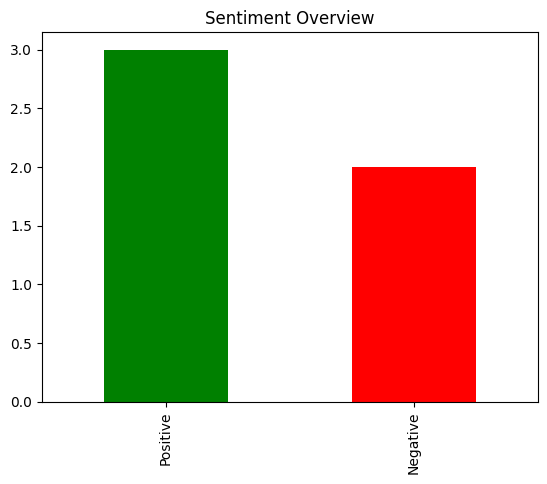

In [6]:
results = []

for review in sample_reviews:
    _, sentiment = analyze_review(review)
    results.append(sentiment.split()[0])  # Extract label only (Positive/Negative/Neutral)

sentiment_summary = pd.Series(results).value_counts()
print("\n📈 Sentiment Summary:")
print(sentiment_summary)

# Simple bar plot
sentiment_summary.plot(kind='bar', color=['green','red','gray'], title='Sentiment Overview')
